### Table of Content

[1. KMeans Scikit-Learn](#km1) <br>

[2. KMeans Implementation](#km2) <br>


## <a id='km1'></a> 1. KMeans Scikit-Learn

In [1]:
import os

# optional: to avoid memory leak on 
# Windows with MKL when using KMeans
os.environ["OMP_NUM_THREADS"] = '1'

from sklearn.cluster import KMeans
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = np.array([[40,45],
                 [60,75],
                 [65,70],
                 [90,90],
                 [100,95],
                 [45,35]])

col_names = ["Math", "Science"]
data = pd.DataFrame(data, columns=col_names)
print(data, "\n")

   Math  Science
0    40       45
1    60       75
2    65       70
3    90       90
4   100       95
5    45       35 



In [3]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data)

KMeans(n_clusters=3, random_state=0)

In [4]:
kmeans.cluster_centers_

array([[95. , 92.5],
       [62.5, 72.5],
       [42.5, 40. ]])

In [5]:
kmeans.inertia_

150.0

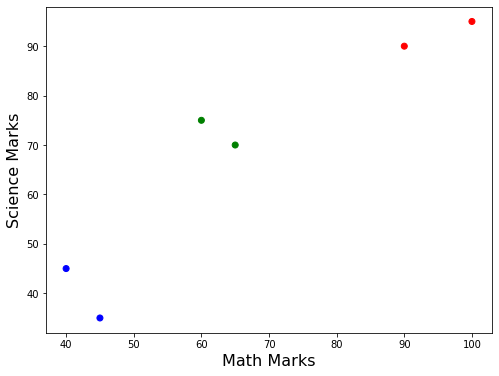

In [6]:
plt.figure(figsize=(8, 6))
labels = kmeans.labels_
colors = ['red','green','blue']
plt.scatter(data['Math'], data['Science'], c=labels, 
            cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('Math Marks', fontsize=16)
plt.ylabel('Science Marks', fontsize=16)
# plt.savefig("kmeans_small_dataset.jpg", dpi=300)
plt.show()

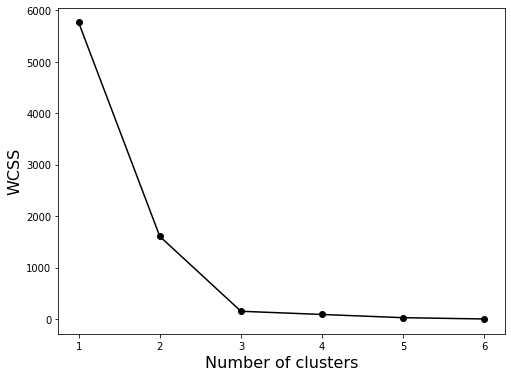

In [7]:
# within cluster sum of squares (WCSS)
# to help decide optimal no. of clusters
wcss=[]
for i in range(1,7):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1,7), wcss, marker='o', c='black')
plt.xlabel('Number of clusters', fontsize=16)
plt.ylabel('WCSS', fontsize=16) 
# plt.savefig("elbow_kmeans.jpg", dpi=300)
plt.show()

<br>WCSS Formula:  

$$
WCSS = \sum_{P_i \in \text{Cluster 1}} \text{distance}(P_i, C_1)^2 + \sum_{P_i \in \text{Cluster 2}} \text{distance}(P_i, C_2)^2 + \sum_{P_i \in \text{Cluster 3}} \text{distance}(P_i, C_3)^2 + \ldots
$$


## <a id='km2'></a> 2. KMeans Implementation

In [8]:
import numpy as np
import pandas as pd
from scipy.spatial import distance

class KMeansCluster:
    '''
    KMeans clustering.
    
    k: int, the number of centroids, default=2
    max_iters: int, the maximum number of iterations, default=300
    '''
    def __init__(self, k=2, max_iters=300):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        
    def assign_clusters(self, X):
        """
        Calculate distances from each sample to the k centroids;
        and then, assign each sample to the closest centroid
        
        Inputs: X - numpy.ndarray, the feature values
        Outputs: assignments - numpy.ndarray, the assigned centroids for all samples
        """
        num_points = X.shape[0]
        num_centroids = self.centroids.shape[0]
        distances = np.zeros((num_points, num_centroids))
        
        for i in range(num_points):
            for j in range(num_centroids):
                distances[i][j] = distance.euclidean(X[i], self.centroids[j])
        
        #print(distances)
        #a 1-D array for the which sample got assigned to which centroid
        assignments = np.argmin(distances, axis=1)
        return assignments

    def update_centroids(self, X, assignments):
        """
        Update the new centroids (i.e., mean of cluster samples values)
        
        Inputs: X - numpy.ndarray, the feature values
                assignments - numpy.ndarray, the assigned centroids for all samples
        Outputs: new_centroids - numpy.ndarray, the updated new centroids
        """
        num_features = X.shape[1]
        new_centroids = np.zeros((self.k, num_features))
        for i in range(self.k):
            assigned_data = X[assignments == i]
            if len(assigned_data) > 0:
                for j in range(num_features):
                    new_centroids[i, j] = np.mean(assigned_data[:, j])
        return new_centroids

    def calculate_wcss(self, X):
        '''
        Calculate the Within-Cluster Sum of Squares (WCSS) value
        
        Inputs: X - numpy.ndarray, the feature values
        Outputs: total_wcss - float, the calcualte WCSS value
        '''
        total_wcss = 0
        for i in range(self.k):
            cluster_data = X[self.assignments == i]
            if len(cluster_data) > 0:
                distances = np.sum((cluster_data - self.centroids[i])**2)
                total_wcss += distances
        return total_wcss

    
    def fit(self, X):
        '''
        Train a KMeans model, find the final assigned centroids, and compute WCSS
        
        Inputs: X - numpy.ndarray, the feature values
        Outputs: None
        '''
        # Step 1 in the book
        np.random.seed(0)
        indexes = np.random.choice(X.shape[0], self.k, replace=False)
        # indexes = np.array([5, 1, 2])
        self.centroids = X[indexes]
        
        for _ in range(self.max_iters):
            assignments = self.assign_clusters(X) # Steps 2 & 3 in the book
            new_centroids = self.update_centroids(X, assignments) # Steps 4 & 5 in the book
            
            # Step 6: stopping criterion, when the k centroids no longer move
            if np.all(new_centroids == self.centroids):
                break
                
            self.centroids = new_centroids # final centroids
        
        self.assignments = assignments
        self.total_wcss = self.calculate_wcss(X)

    def predict(self, X):
        """
        Predict the nearest centroid for each sample in X based on the found centroids;
        essentially the same as the assign_clusters method above.

        Inputs:
        X - numpy.ndarray, the new sample(s) to be clustered

        Outputs:
        - numpy.ndarray, the index of the closest centroid for each sample
        """
        return self.assign_clusters(X)

In [9]:
data = np.array([[40,45],
                 [60,75],
                 [65,70],
                 [90,90],
                 [100,95],
                 [45,35]])

col_names = ["Math", "Science"]
print(pd.DataFrame(data, columns=col_names), "\n")

   Math  Science
0    40       45
1    60       75
2    65       70
3    90       90
4   100       95
5    45       35 



In [10]:
kmeans_c = KMeansCluster(k=3)
kmeans_c.fit(data)
print("Centroids:\n", kmeans_c.centroids)
print("Assignments:", kmeans_c.assignments)
print("WCSS:", kmeans_c.total_wcss)

Centroids:
 [[42.5 40. ]
 [62.5 72.5]
 [95.  92.5]]
Assignments: [0 1 1 2 2 0]
WCSS: 150.0


In [11]:
kmeans_c.predict(np.array([[100,99]]))

array([2], dtype=int64)